<a href="https://colab.research.google.com/github/Jane-2402/Boston-housing-price-prediction/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving boston.csv to boston.csv


In [ ]:
df = pd.read_csv("boston.csv")
X = df.drop("MEDV", axis=1)
y=df["MEDV"]

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
print(df.shape)

(506, 14)


In [ ]:
print(df.info)

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# EDA
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


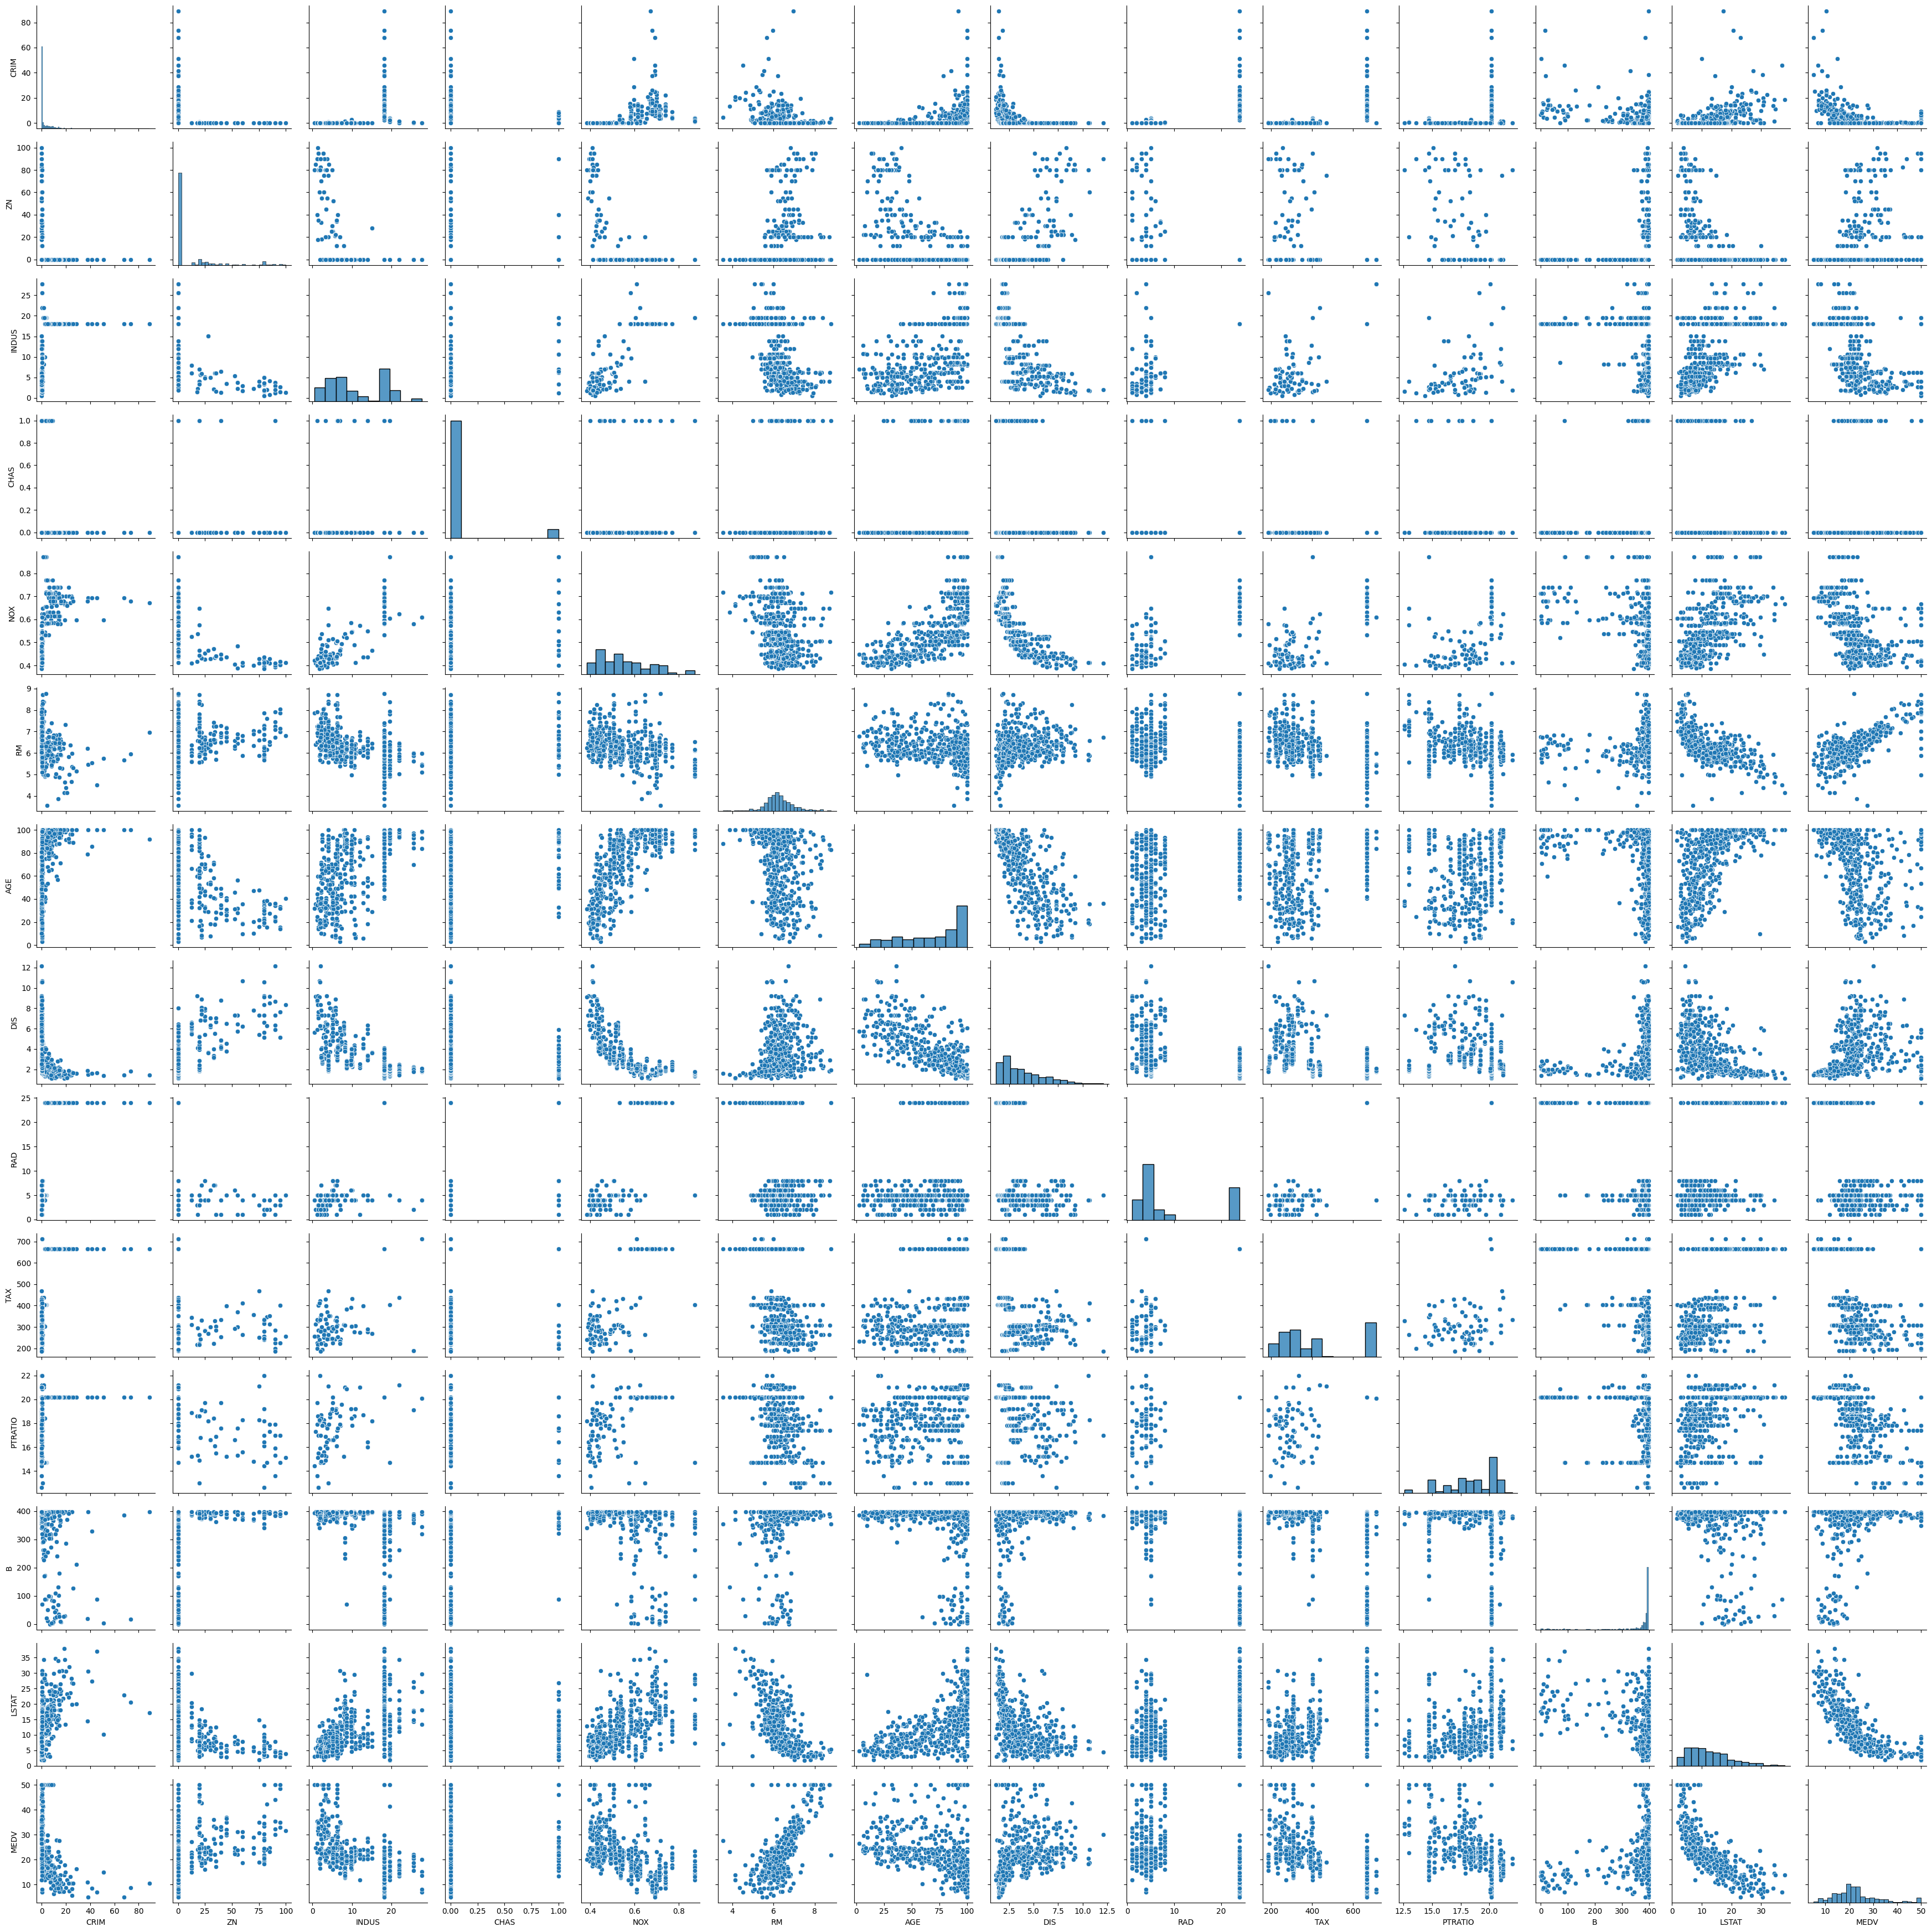

In [ ]:
sns.pairplot(df, height=2.5)
plt.tight_layout()

<Axes: xlabel='MEDV', ylabel='Density'>

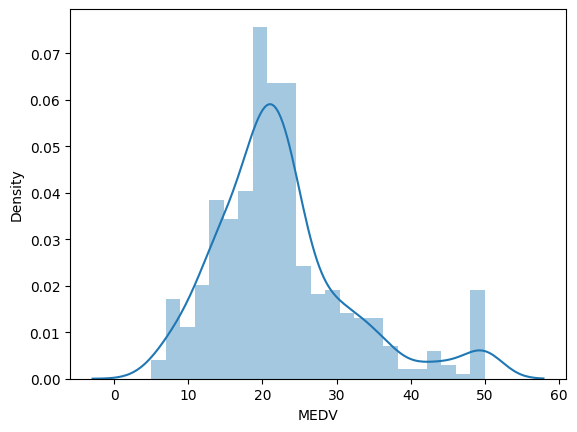

In [ ]:
sns.distplot(df['MEDV'])

In [ ]:
print("Skewness: %f" % df['MEDV'].skew())
print("Kurtosis: %f" % df['MEDV'].kurt())

Skewness: 1.108098
Kurtosis: 1.495197


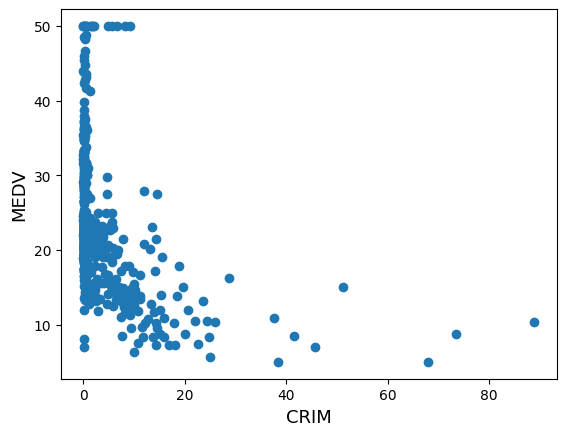

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = df['CRIM'], y = df['MEDV'])
plt.ylabel('MEDV', fontsize=13)
plt.xlabel('CRIM', fontsize=13)
plt.show()

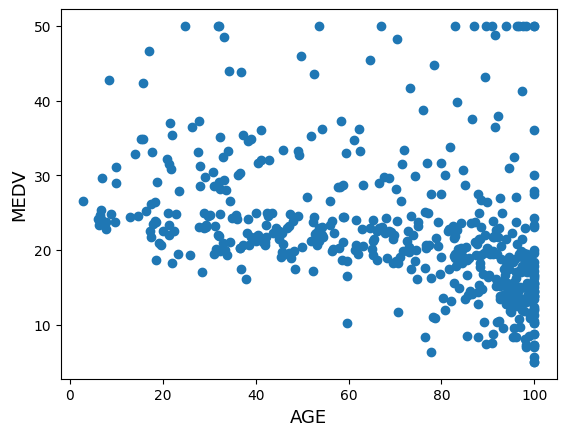

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = df['AGE'], y = df['MEDV'])
plt.ylabel('MEDV', fontsize=13)
plt.xlabel('AGE', fontsize=13)
plt.show()

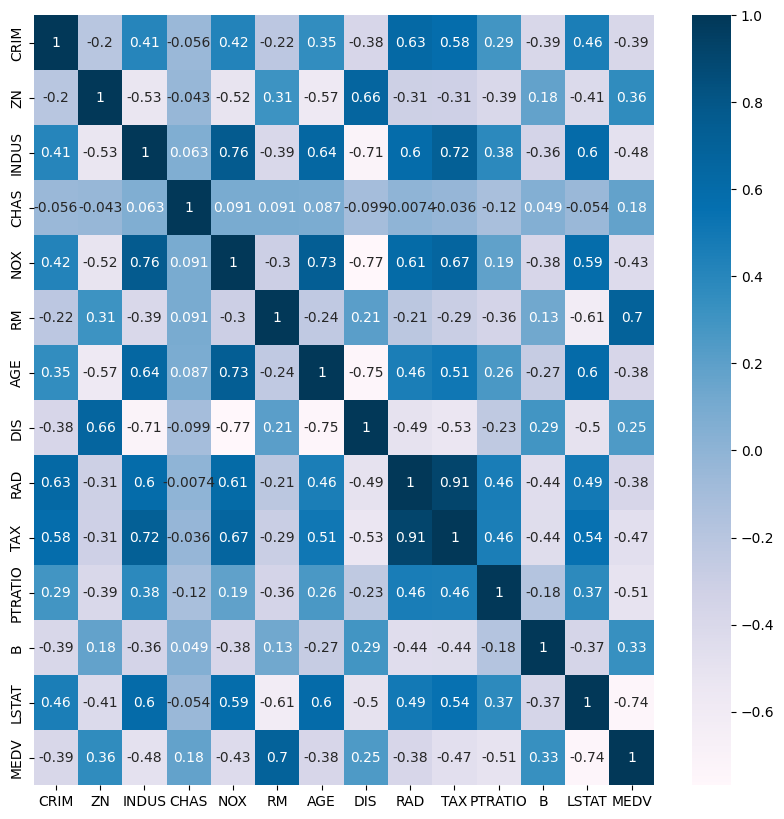

In [ ]:
# Data correlation
plt.figure(figsize=(10,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

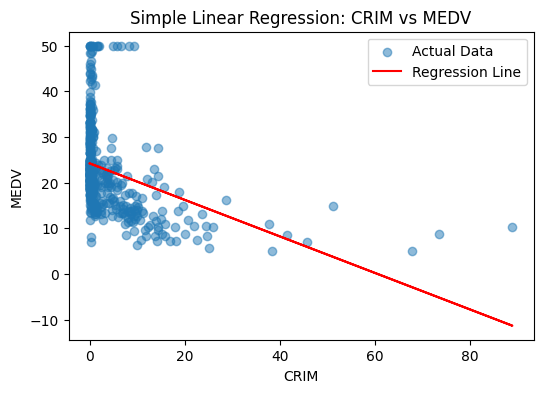

Mean Squared Error (MSE): 61.69413745566079
R-squared (R2 Score): 0.15872146782902874


In [ ]:
#SIMPLE LINEAR REGRESSION
X = df[['CRIM']]      # Independent variable
y = df['MEDV']     # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(6,4))
plt.scatter(X, y, alpha=0.5, label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('CRIM')
plt.ylabel('MEDV')
plt.title('Simple Linear Regression: CRIM vs MEDV')
plt.legend()
plt.show()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2 Score):", r2)

In [ ]:
X = df[['CRIM']]
y = df['MEDV']

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

print("Slope (m):", slope)
print("Intercept (c):", intercept)

print("\nINTERPRETATION:")
print(f"Slope: For every 1 unit increase in CRIM, MEDV decreases by approximately {slope:.4f} units.")
print(f"Intercept: When CRIM is 0, the predicted MEDV is approximately {intercept:.2f}.")

Slope (m): -0.41519027791509083
Intercept (c): 24.03310617412388

INTERPRETATION:
Slope: For every 1 unit increase in CRIM, MEDV decreases by approximately -0.4152 units.
Intercept: When CRIM is 0, the predicted MEDV is approximately 24.03.


MSE: 44.867954343964435
RMSE: 6.698354599747944
R² Score: 0.3881680119260488

Intercept: 30.63955389723602
Coefficients:
CRIM: -0.16815356160758477
AGE: -0.019005590119899593
ZN: 0.06384276716828206
TAX: -0.01651302419858705


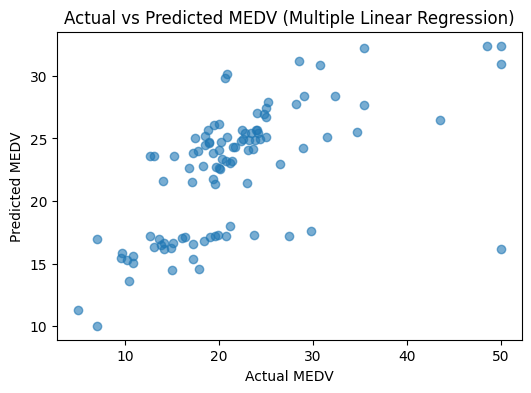

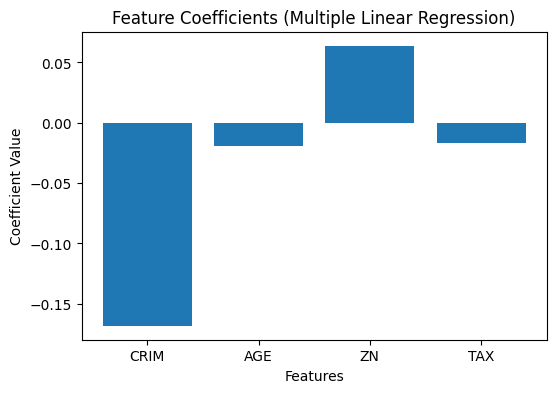

In [ ]:
#MULTIPLE REGRESSION
X = df[['CRIM', 'AGE', 'ZN', 'TAX']]
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


print("\nIntercept:", model.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted MEDV (Multiple Linear Regression)")
plt.show()
plt.figure(figsize=(6,4))
plt.bar(X.columns, model.coef_)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Feature Coefficients (Multiple Linear Regression)")
plt.show()

LINEAR REGRESSION
MSE: 61.69413745566079
RMSE: 7.854561569919787
R2 Score: 0.15872146782902874

POLYNOMIAL REGRESSION
MSE: 60.08062354776299
RMSE: 7.751169172954683
R2 Score: 0.18072379524707993


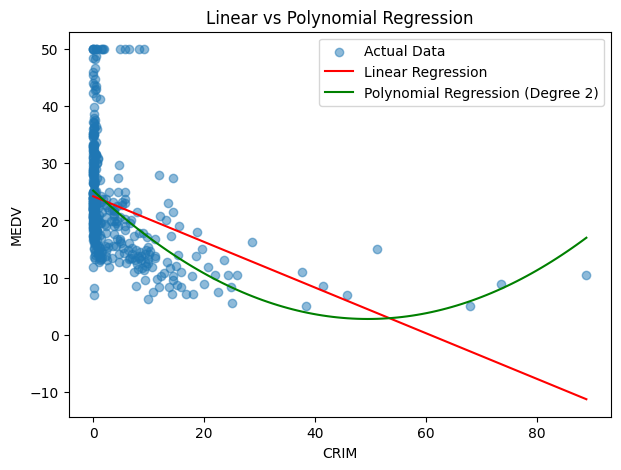

In [ ]:
#POLYNOMIAL REGRESSION
X = df[['CRIM']]      # independent variable
y = df['MEDV']     # target variable

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred_lin = lin_model.predict(X_test)

mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_test, y_pred_lin)

poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_poly = poly_model.predict(X_test_poly)

mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print("LINEAR REGRESSION")
print("MSE:", mse_lin)
print("RMSE:", rmse_lin)
print("R2 Score:", r2_lin)

print("\nPOLYNOMIAL REGRESSION")
print("MSE:", mse_poly)
print("RMSE:", rmse_poly)
print("R2 Score:", r2_poly)

X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

plt.figure(figsize=(7,5))
plt.scatter(X, y, alpha=0.5, label="Actual Data")

plt.plot(X_range, lin_model.predict(X_range),
         color='red', label="Linear Regression")

plt.plot(X_range, poly_model.predict(poly.transform(X_range)),
         color='green', label="Polynomial Regression (Degree 2)")

plt.xlabel("CRIM")
plt.ylabel("MEDV")
plt.title("Linear vs Polynomial Regression")
plt.legend()
plt.show()

LINEAR COEFFICIENTS:
CRIM: -1.4905245097801747
AGE: -0.5314011175437074
ZN: 1.4762879546044463
TAX: -2.740614915709866

RIDGE COEFFICIENTS:
CRIM: -1.4905867548722034
AGE: -0.5360581927927716
ZN: 1.472251131978933
TAX: -2.732805938312738

LASSO COEFFICIENTS:
CRIM: -1.4323244952780196
AGE: -0.5025886844951853
ZN: 1.4146183560430499
TAX: -2.705927459189973


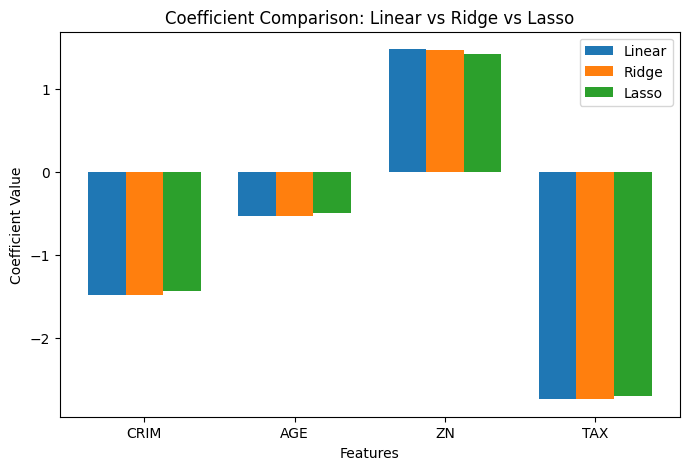

In [ ]:
#REGULARIZATION
X = df[['CRIM', 'AGE', 'ZN', 'TAX']]
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_model = LinearRegression()
lin_model.fit(X_train_scaled, y_train)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)

features = X.columns

lin_coef = lin_model.coef_
ridge_coef = ridge_model.coef_
lasso_coef = lasso_model.coef_

print("LINEAR COEFFICIENTS:")
for f, c in zip(features, lin_coef):
    print(f"{f}: {c}")

print("\nRIDGE COEFFICIENTS:")
for f, c in zip(features, ridge_coef):
    print(f"{f}: {c}")
print("\nLASSO COEFFICIENTS:")
for f, c in zip(features, lasso_coef):
    print(f"{f}: {c}")

x = np.arange(len(features))
width = 0.25

plt.figure(figsize=(8,5))
plt.bar(x - width, lin_coef, width, label='Linear')
plt.bar(x, ridge_coef, width, label='Ridge')
plt.bar(x + width, lasso_coef, width, label='Lasso')

plt.xticks(x, features)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Coefficient Comparison: Linear vs Ridge vs Lasso")
plt.legend()
plt.show()

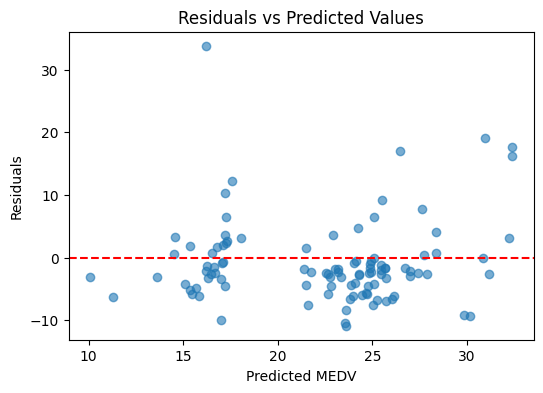

In [ ]:
#MODEL DIAGNOSTICS
X = df[['CRIM', 'AGE', 'ZN', 'TAX']]
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()